In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t

In [2]:
def convertToRgb(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

def plot(im, convert=False):
    fig, ax = plt.subplots(figsize=(25, 25))
    if convert:
        ax.imshow(convertToRgb(im))
    else:
        ax.imshow(im)
        
def makeLine(im, rho, theta):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 10000*(-b))
    y1 = int(y0 + 10000*(a))

    x2 = int(x0 - 10000*(-b))
    y2 = int(y0 - 10000*(a))
    cv2.line(im, (x1, y1), (x2, y2), (0,0,255), 1)

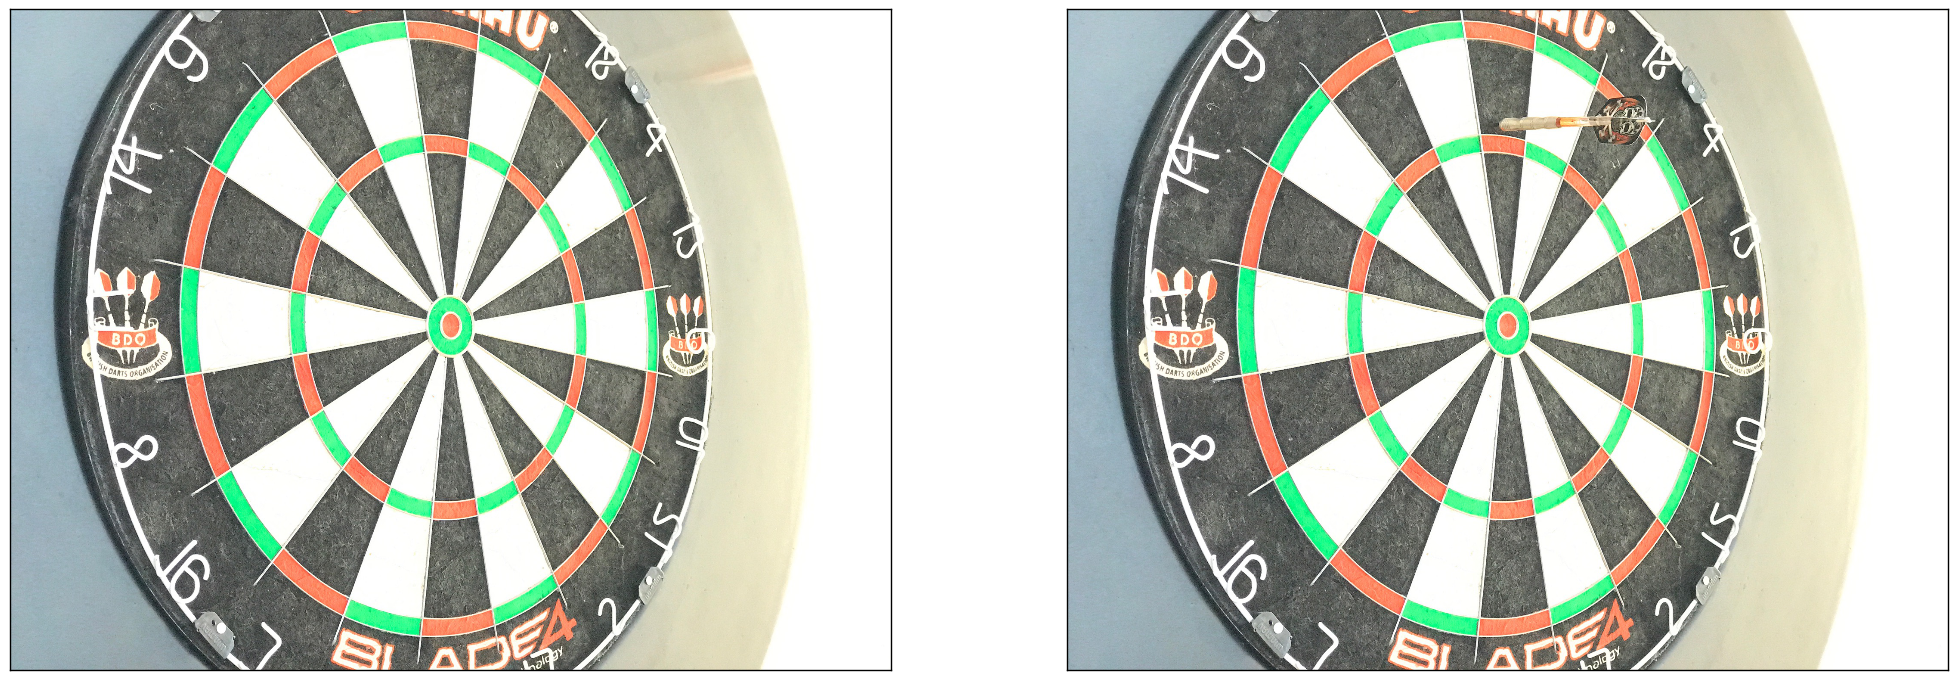

In [3]:
background = cv2.imread('samples/HK_test1-1.JPG',cv2.IMREAD_COLOR)
arrow = cv2.imread('samples/HK_test1-2.JPG',cv2.IMREAD_COLOR)
plt.subplots(figsize=(25,25))
plt.subplot(121);plt.xticks([]);plt.yticks([]);plt.imshow(convertToRgb(background))
plt.subplot(122);plt.xticks([]);plt.yticks([]);plt.imshow(convertToRgb(arrow))
plt.show()

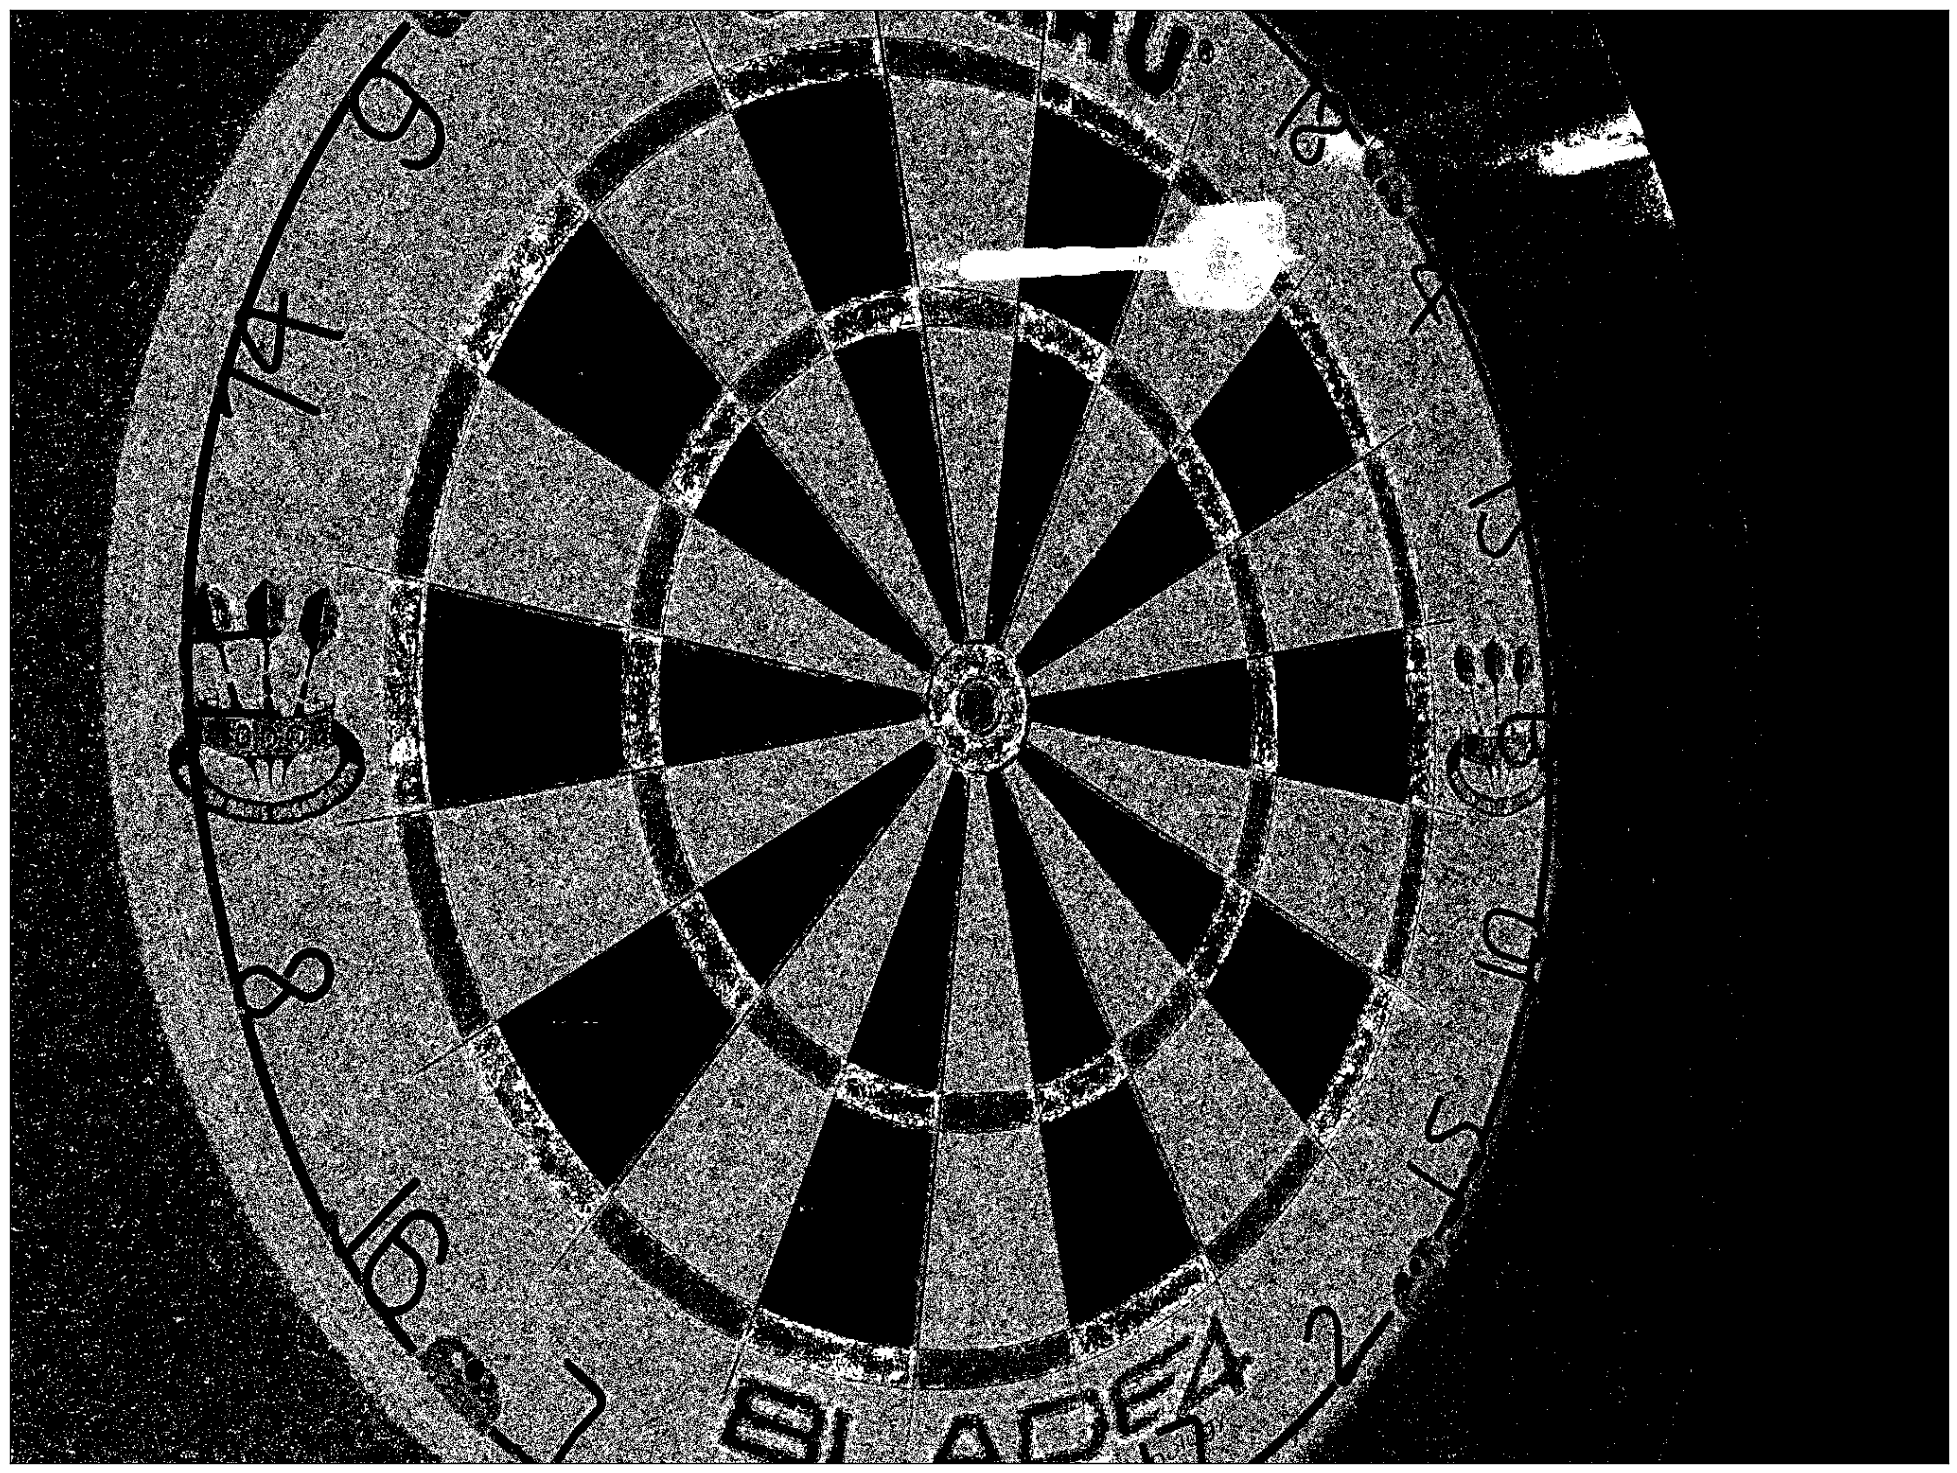

In [4]:
#background subtraction
fgbg = cv2.createBackgroundSubtractorMOG2()
fgmask = fgbg.apply(background)
fgmask = fgbg.apply(arrow)
plt.subplots(figsize=(25,25))
plt.subplot();plt.xticks([]);plt.yticks([]);plt.imshow(fgmask,cmap='gray');plt.show()
#wow - that's a lot of noise - feature of camera when overblown exposure - and wth is the artifact up right?

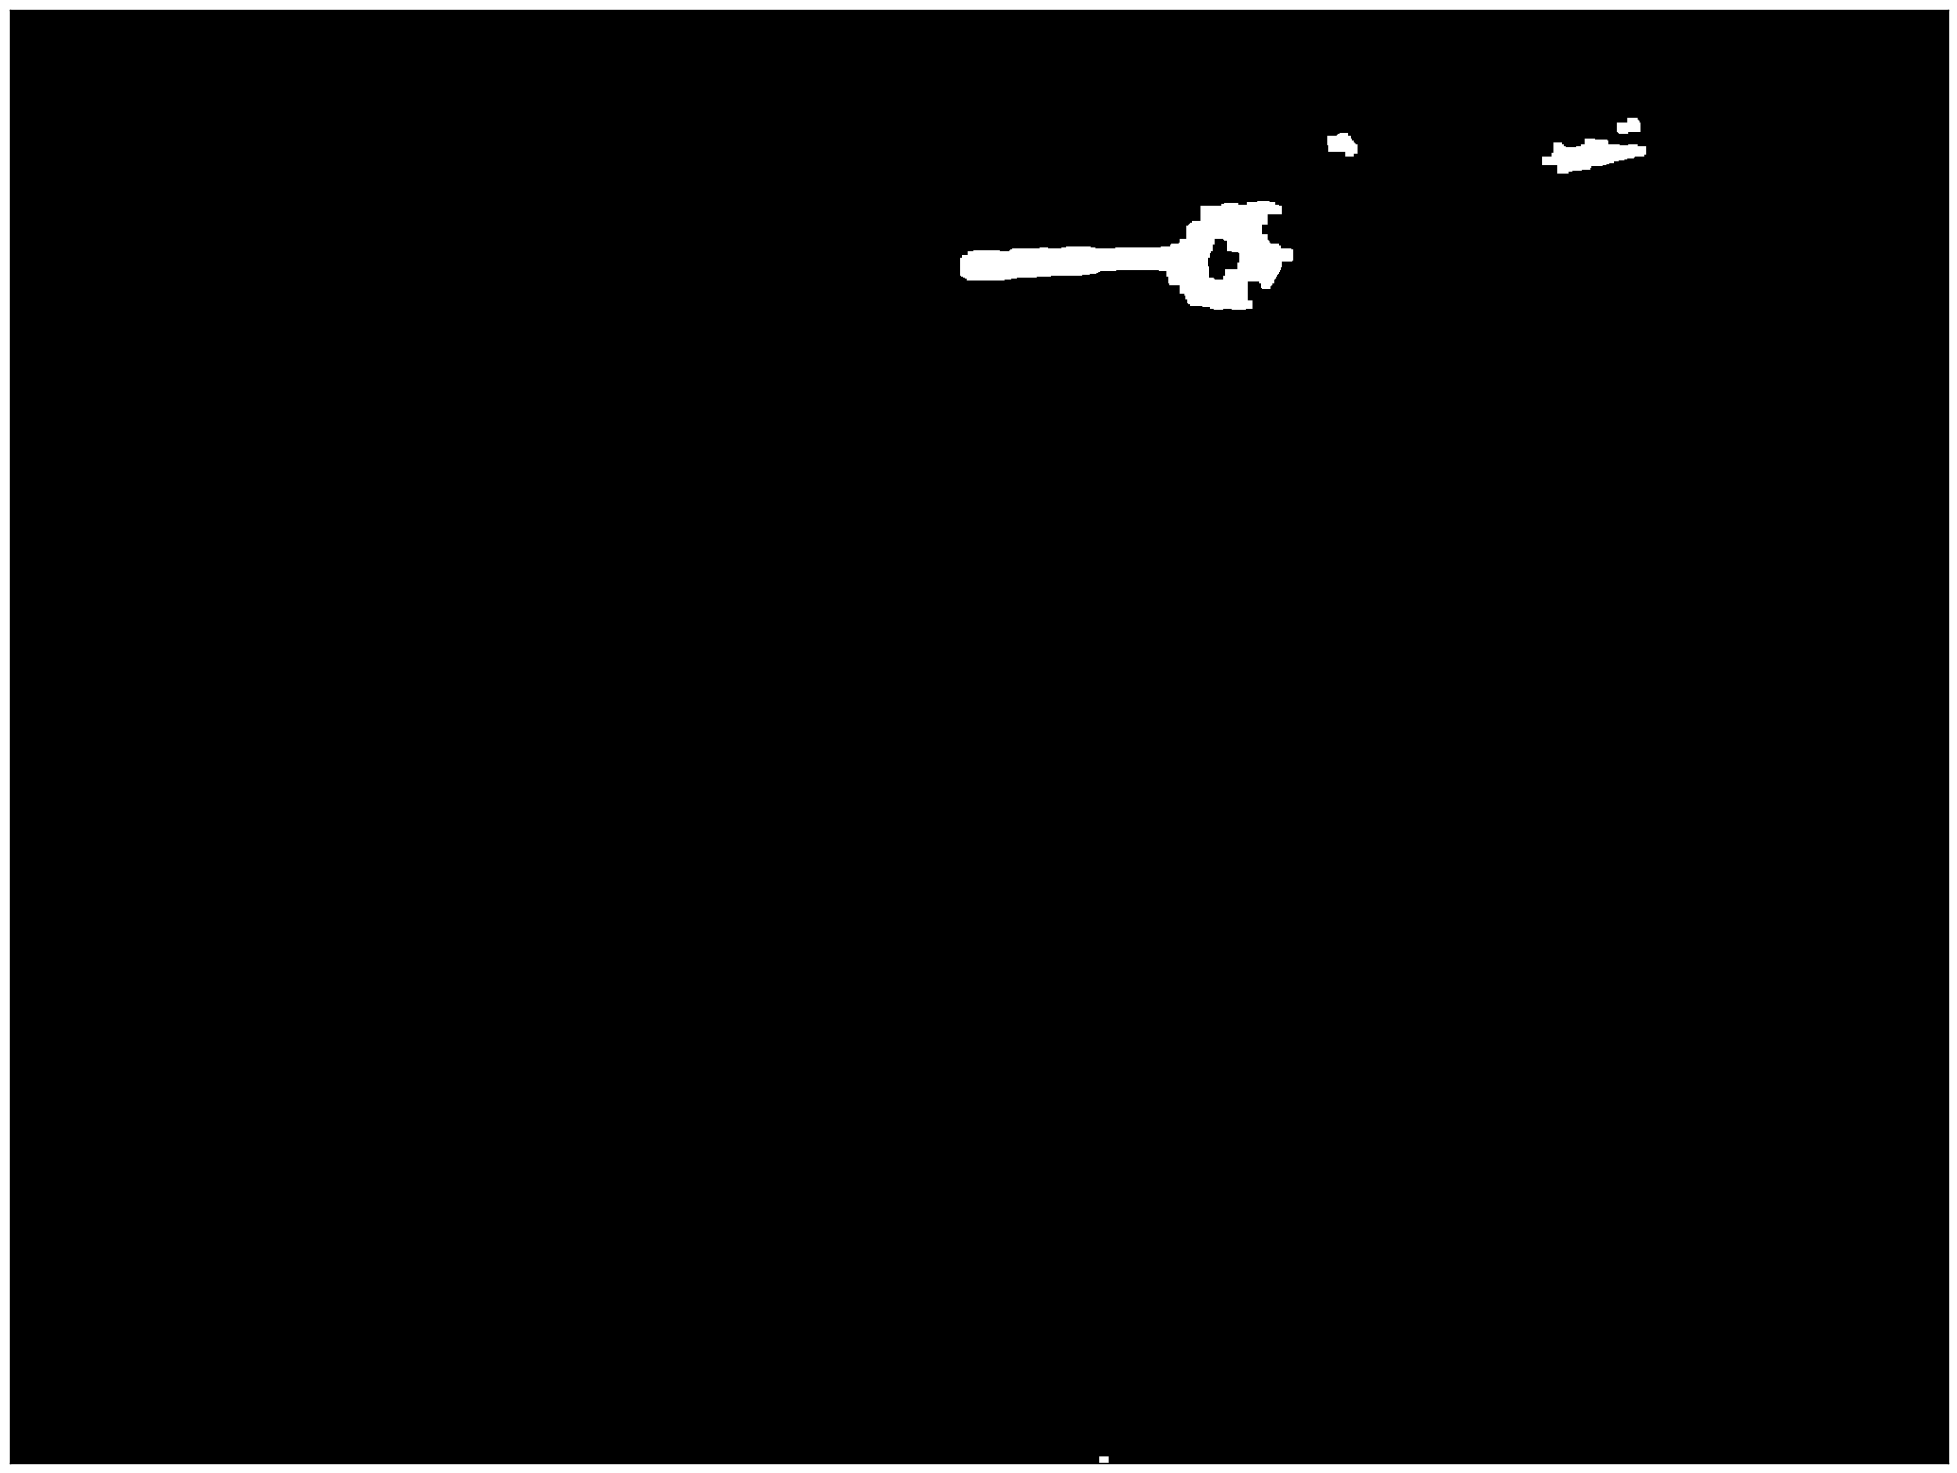

In [5]:
#do smart thresholding on mask
#gmask = cv2.GaussianBlur(fgmask,(11,11),0)
#ret, tmask = cv2.threshold(gmask,124,255,cv2.THRESH_BINARY)
#and some gdilatation
kernel = np.ones((9,9),np.uint8)
opening = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
ret, tmask = cv2.threshold(closing,124,255,cv2.THRESH_BINARY)

plt.subplots(figsize=(25,25));plt.subplot();plt.xticks([]);plt.yticks([]);plt.imshow(tmask,cmap='gray');plt.show()



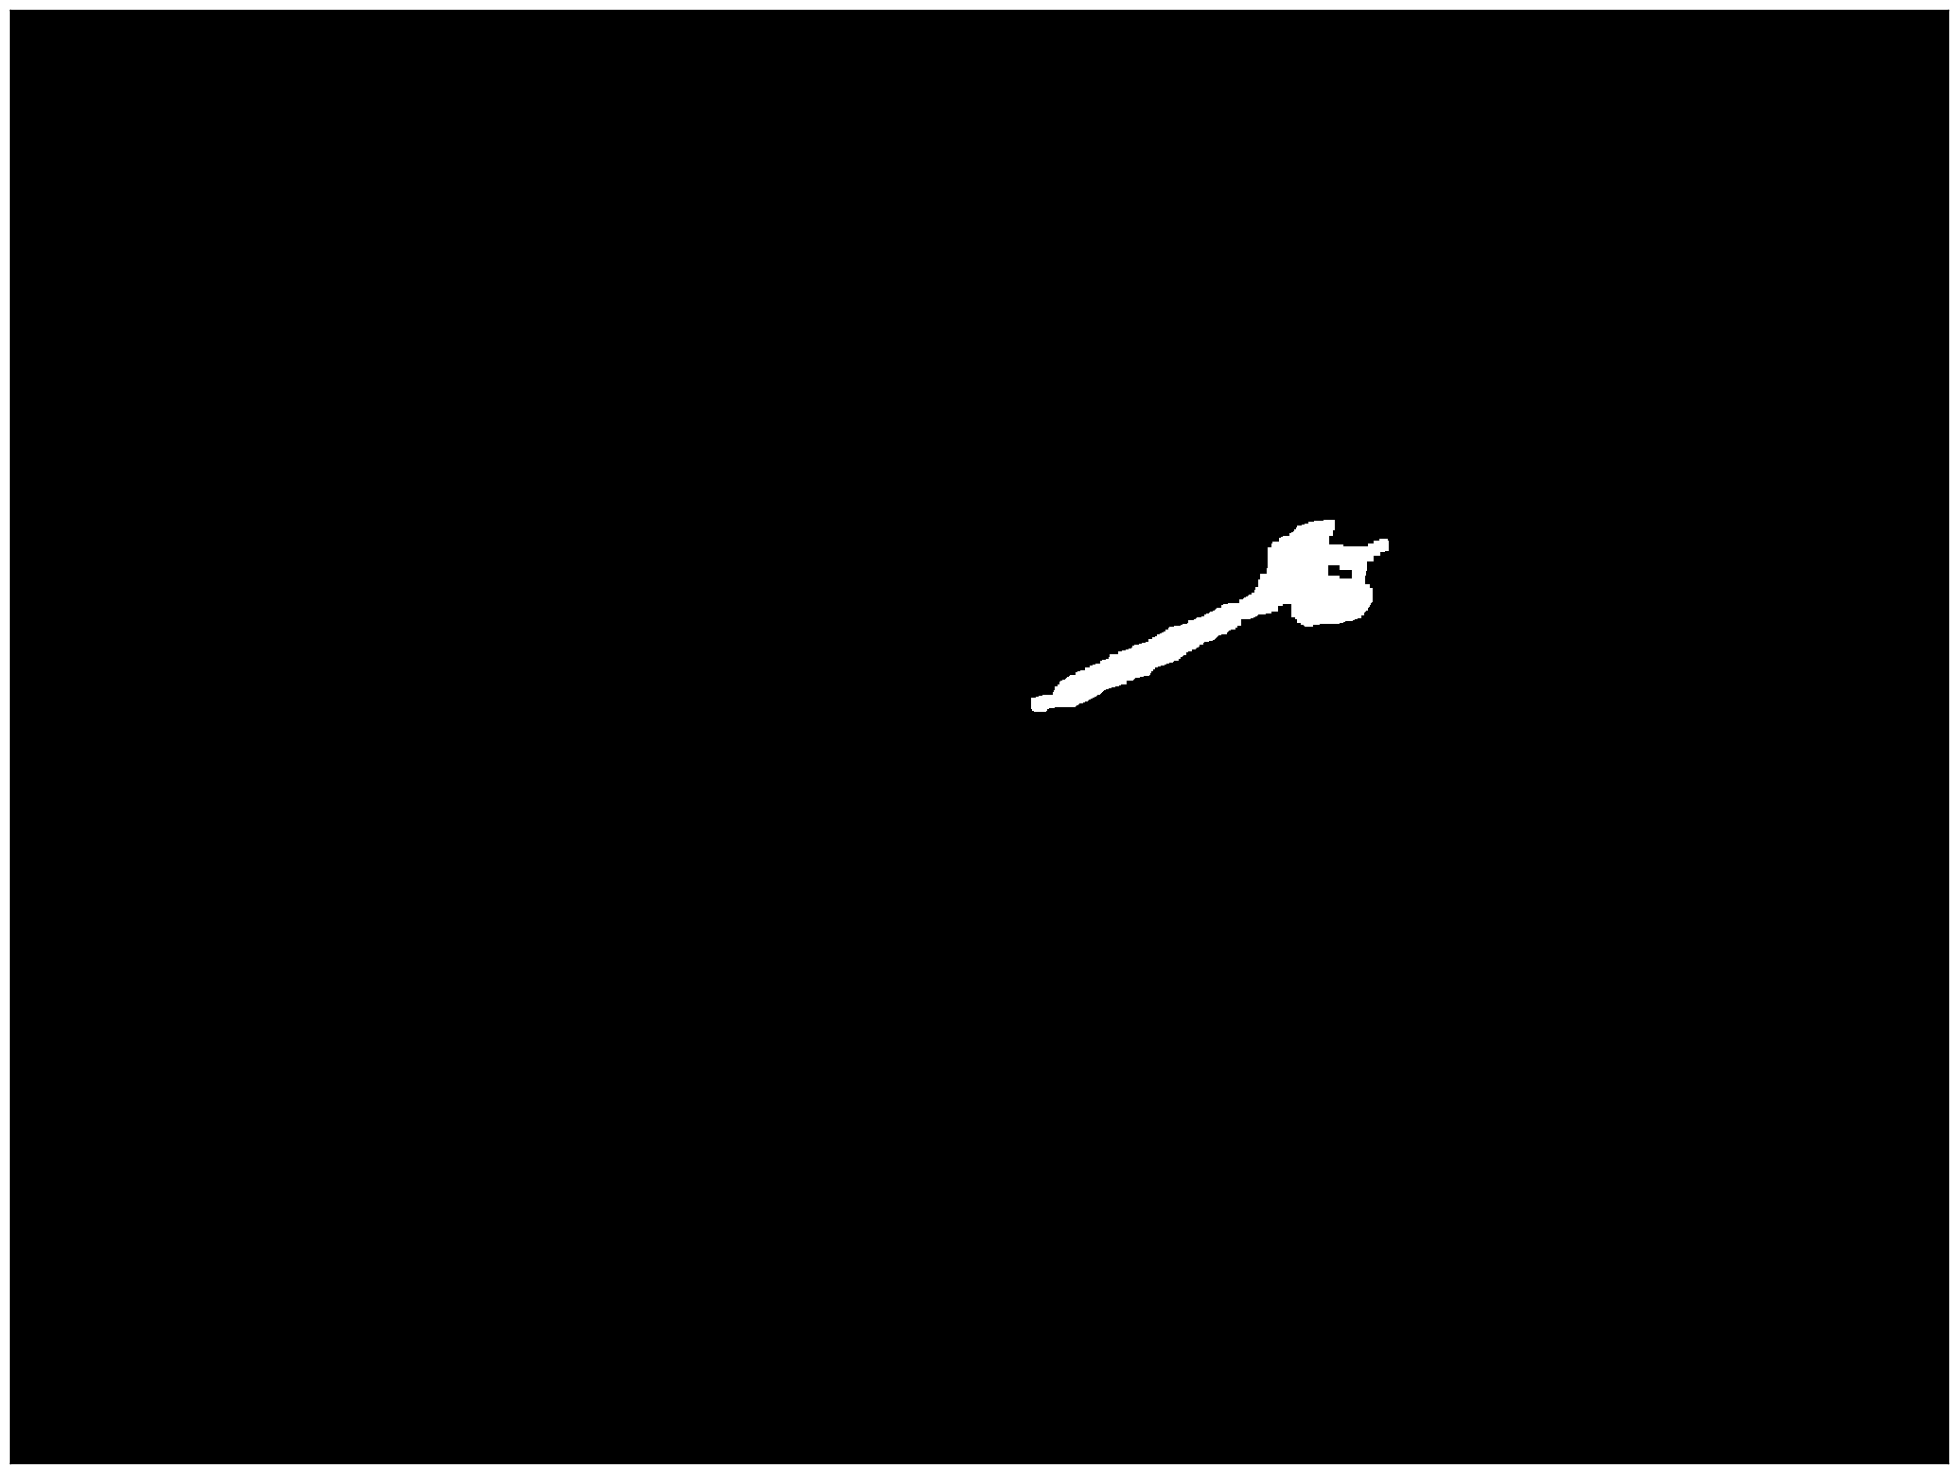

In [6]:
background = cv2.imread('samples/HK_test2-1.JPG',cv2.IMREAD_COLOR)
arrow = cv2.imread('samples/HK_test2-2.JPG',cv2.IMREAD_COLOR)
fgbg2 = cv2.createBackgroundSubtractorMOG2()
fgmask2 = fgbg2.apply(background)
fgmask2 = fgbg2.apply(arrow)
kernel = np.ones((9,9),np.uint8)
opening = cv2.morphologyEx(fgmask2, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
ret, tmask2 = cv2.threshold(closing,124,255,cv2.THRESH_BINARY)
plt.subplots(figsize=(25,25))
plt.subplot();plt.xticks([]);plt.yticks([]);plt.imshow(tmask2,cmap='gray');plt.show()